**B. Apply LDA Algorithm on Iris Dataset and classify which species a given flower belongs to.**

Import necessary libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import time

Load the Iris dataset

In [17]:
df = pd.read_csv('dataset/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
20,21,5.4,3.4,1.7,0.2,Iris-setosa
46,47,5.1,3.8,1.6,0.2,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
45,46,4.8,3.0,1.4,0.3,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
117,118,7.7,3.8,6.7,2.2,Iris-virginica
123,124,6.3,2.7,4.9,1.8,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
132,133,6.4,2.8,5.6,2.2,Iris-virginica


In [19]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [20]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Separate features and target variable

In [23]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Encode the target variable (species)

In [24]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

Split the dataset into training and test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

Train and evaluate Logistic Regression without LDA

In [26]:
start_time = time.time()
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Aniket\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
accuracy_without_lda = accuracy_score(y_test, y_pred)
time_without_lda = time.time() - start_time

In [28]:
print("Without LDA:")
print(f"Accuracy: {accuracy_without_lda * 100:.2f}%")
print(f"Time taken: {time_without_lda:.4f} seconds\n")

Without LDA:
Accuracy: 100.00%
Time taken: 0.3224 seconds



Apply Linear Discriminant Analysis for dimensionality reduction

In [29]:
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 dimensions
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

Train and evaluate Logistic Regression after LDA

In [30]:
start_time = time.time()
model_lda = LogisticRegression()
model_lda.fit(X_train_lda, y_train)
y_pred_lda = model_lda.predict(X_test_lda)

In [31]:
accuracy_with_lda = accuracy_score(y_test, y_pred_lda)
time_with_lda = time.time() - start_time

In [32]:
print("With LDA:")
print(f"Accuracy: {accuracy_with_lda * 100:.2f}%")
print(f"Time taken: {time_with_lda:.4f} seconds")

With LDA:
Accuracy: 100.00%
Time taken: 0.2789 seconds


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

LDA-transformed Data Visualization

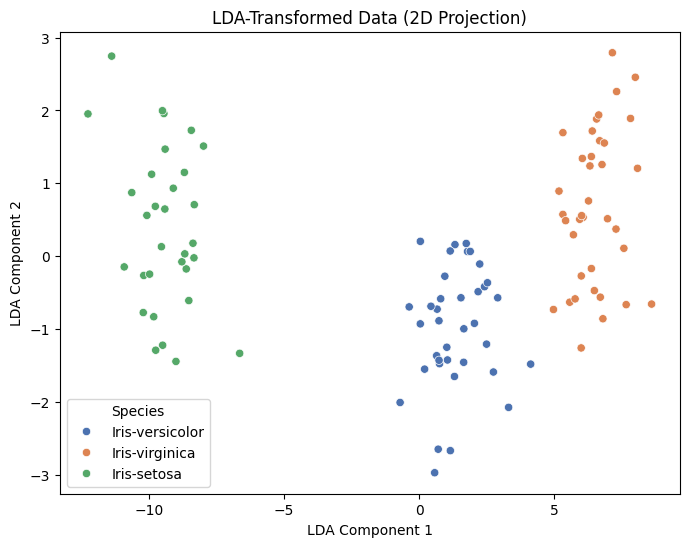

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_lda[:, 0], y=X_train_lda[:, 1], hue=label_encoder.inverse_transform(y_train), palette='deep')
plt.title("LDA-Transformed Data (2D Projection)")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(title="Species")
plt.show()